# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.1


### Creating Data to View and Fit

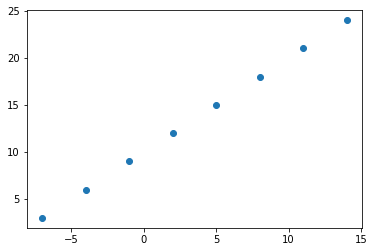

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.show()

### Input and Output Shapes

In [3]:
# Create a a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedrooms", "bathrooms", "garage_size"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garage_size'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
X[1], y[1]

(-4.0, 6.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
output_shape, input_shape

((), ())

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our NumPy arays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

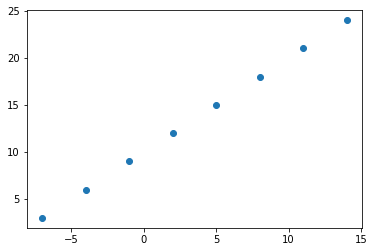

In [10]:
plt.scatter(X, y)
plt.show()

### Steps in Modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns it is learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [11]:
X = X[..., None]
y = y[..., None]

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 185ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[12.716021]], dtype=float32)

### Improving Our Model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fit the model** - fit the model for more **epochs** or on more data

In [15]:
# Let's rebuild our model
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 161ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

1/1 [==============================] - 0s 1ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 1000us/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 1000us/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 6.898

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[29.739855]], dtype=float32)

In [17]:
# Let's see if we can improve our code to improve our model
# 1. Create a model (Add a hidden layer with )
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 209ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 0.1901 - mae: 0.1901
Epoch 89/100
1/1 [==============================] - 0s 1000us/step - loss: 0.1354 - mae: 0.1354
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1218 - mae: 0.1218
Epoch 91/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0382 - mae: 0.0382
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2197 - mae: 0.2197
Epoch 93/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2189 - mae: 0.2189
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1427 - mae: 0.1427
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1168 - mae: 0.1168
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2069 - mae: 0.2069
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1524 - mae: 0.1524
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 0.213

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 32ms/step


array([[26.583532]], dtype=float32)

### Evaluating A Model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> ...
```

When it comes to evaluation, there are three words you should memorize:

> "Visualize, visualize, visualize"
    
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against ground truth?
    

In [116]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [117]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

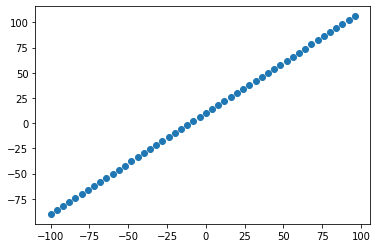

In [118]:
# Visualize the data
plt.scatter(X, y);

#### The Three Sets...

* **Training Set** - The model lerans from this data, which is typically 70-80% of the total data you have available
* **Validation Set** - The model gets tuned on this data, which is typically 10-15% of data available
* **Test Set** - The model is evaluated on this data to test what it has learned. This set is typically 10-15% of data available

In [119]:
# Check the length of the samples
len(X)

50

In [120]:
# Split the data into train and test sets
X_train = X[:40] # 80%
y_train = y[:40]

X_test = X[40:] # 20%
y_test = y[40:]

### Visualizing the Data

Now that we have our training and test sets, let's visualize it again!

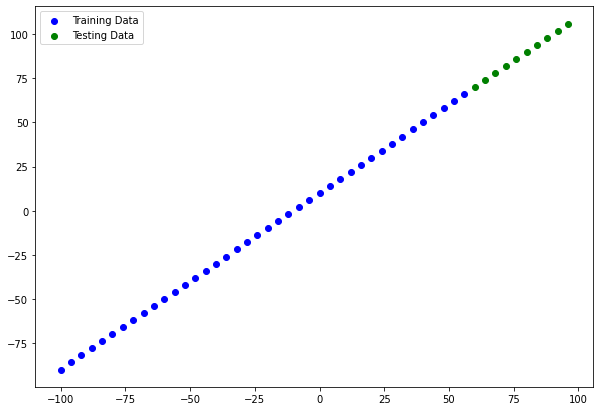

In [24]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#Show a legend
plt.legend();

In [25]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the Model

In [51]:
# model.summary() # error here

In [97]:
# Let's create a model which builds automatically by defining the `input_shape` in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_one")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [58]:
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Parameters - Total number of parameters in the model
* Trainable Parameters - Parameters the model can update as it trains
* Non-trainable Parameters - Parameters that aren't updated during training. This is typical when you use already learned patters or parameters from other model during transfer learning.

In [59]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
# Get a summary of our model
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
from tensorflow.keras.utils import plot_model
#plot_model(model=model) # Need graphviz, doesn't want to work rn

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often, you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth versus your models predictions)

In [63]:
# Make some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 12ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [66]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    Plots training data, test data, and compares predicitons to ground truths
    """
    plt.figure(figsize=(10, 7))
    # Plot training datat in blue
    plt.scatter(train_data, train_labels, c='b', label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing Data")
    # Plot predictions in red
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    # Show the legend
    plt.legend();

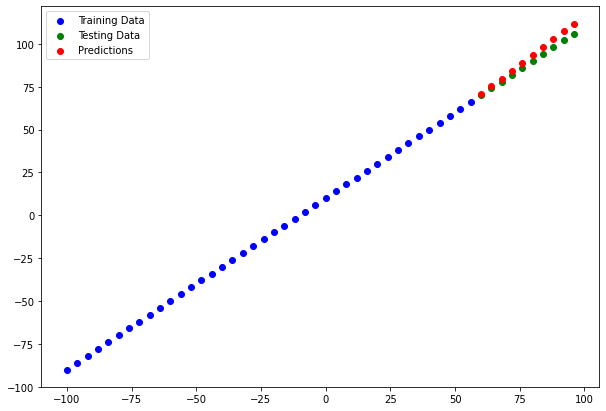

In [70]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating Our Model's Predicitons with Regression Analysis

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - Mean Absolute Error
* MSE - Mean Square Error

In [86]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [87]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred)) # Dimension match
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [88]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [104]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running Experiments to Improve Our Model

1. Get more data
2. Make your model larger
3. Train for longer

Let's do three modeling experiments:

1. `model_1` - 1 layer, trained for 100 epochs (same as original
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. 
5.

**Build `model_1`**

In [98]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 24ms/step


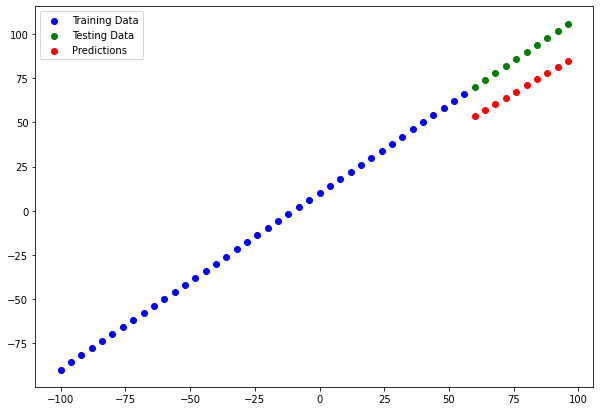

In [99]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1)

In [105]:
# Calculate model_1 evalutaion metircs
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

In [126]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 26ms/step


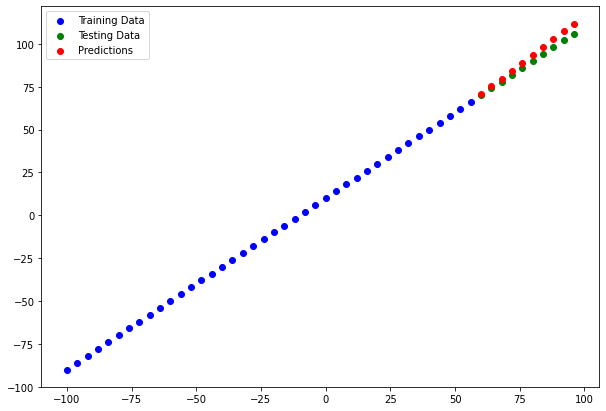

In [138]:
y_pred_2 = model_2.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [139]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

In [140]:
# Set the seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 26ms/step


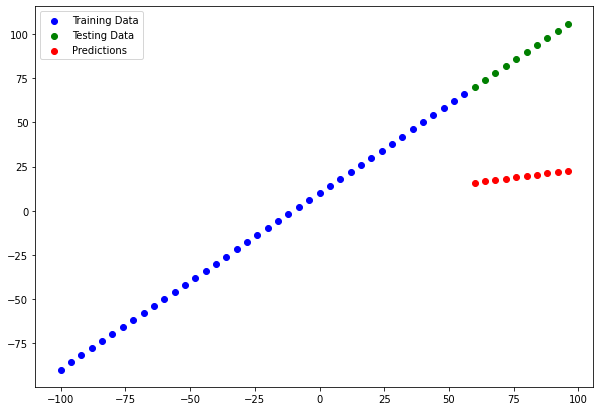

In [141]:
y_pred_3 = model_3.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

In [143]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** Start with small experiments and make sure they work. Increase scale when necessary.

### Comparing the Results of Our Experiments

We've run a few experiments now, let's compare the results

In [146]:
# Let's compare our models' results using Pandas
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [147]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments, the more things you can figure out about your model.

### Tracking Your Experiments

One really good habit in machine learning modeling is to track the results of your experiments.

When doing so, it can be tedious if you;re running lots of experiments.

Luckily, there are tools to help us.

📖 **Resource:** As you build more models, you'll want to look into using :
* TensorBoard - a component of TensorFlow library to help track modeling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving Our Models

Saving our models allows us to use them outside of Google Collab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models to:
* The SavedModel format
* The HDF5 format

In [148]:
# Save model using the SavedModel format

model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [149]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

### Loading In a Saved Model

In [152]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format/")
loaded_SavedModel_format.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Compare model_2 predicitions with SavedModel format model predictions 

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 10ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [155]:
# Load in the model using the HDF5 model format
loaded_H5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_H5_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [156]:
# Check to see if loaded .h5 model presictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_H5_model_preds = loaded_H5_model.predict(X_test)

model_2_preds == loaded_H5_model_preds

1/1 [==============================] - 0s 28ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A Larger Example

In [345]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [346]:
# Read in the insurace dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [347]:
# Let's try to one-hot encode our dataframe so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [348]:
# Create X and y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [349]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [350]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [351]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [352]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
history_1 = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 515us/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 455us/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 515us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 515us/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 546us/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 485us/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 485us/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 485us/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 485us/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 485us/step - loss: 7493.1

34/34 [==============================] - 0s 515us/step - loss: 7279.3784 - mae: 7279.3784
Epoch 81/100
34/34 [==============================] - 0s 546us/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 576us/step - loss: 7176.5210 - mae: 7176.5210
Epoch 83/100
34/34 [==============================] - 0s 546us/step - loss: 7425.6294 - mae: 7425.6294
Epoch 84/100
34/34 [==============================] - 0s 546us/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 515us/step - loss: 7356.0088 - mae: 7356.0088
Epoch 86/100
34/34 [==============================] - 0s 515us/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 515us/step - loss: 7217.6074 - mae: 7217.6074
Epoch 88/100
34/34 [==============================] - 0s 546us/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 546us/step - loss: 7134.1558 

In [353]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 625us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Right now, it looks like our model isn't performing too well. Let's try to improve it!

To (try) to improve our model, we'll run two experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer
3. (Insert your own experiment here)

In [354]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 546us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 515us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 546us/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 576us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 546us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/100
34/34 [==============================] - 0s 576us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 576us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 546us/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 546us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 546us/step - lo

34/34 [==============================] - 0s 576us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/100
34/34 [==============================] - 0s 576us/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/100
34/34 [==============================] - 0s 546us/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/100
34/34 [==============================] - 0s 606us/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 546us/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/100
34/34 [==============================] - 0s 546us/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/100
34/34 [==============================] - 0s 546us/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/100
34/34 [==============================] - 0s 546us/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/100
34/34 [==============================] - 0s 576us/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/100
34/34 [==============================] - 0s 546us/step - loss: 5600.6655 

In [355]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 625us/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

Text(0.5, 0, 'epochs')

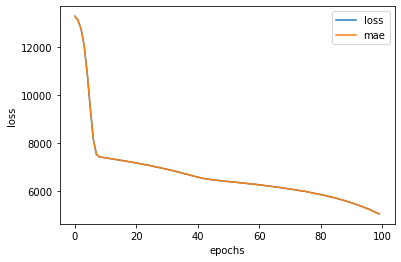

In [356]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [357]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 546us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 [==============================] - 0s 576us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/300
34/34 [==============================] - 0s 515us/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/300
34/34 [==============================] - 0s 546us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/300
34/34 [==============================] - 0s 546us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/300
34/34 [==============================] - 0s 515us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/300
34/34 [==============================] - 0s 546us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/300
34/34 [==============================] - 0s 546us/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/300
34/34 [==============================] - 0s 515us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/300
34/34 [==============================] - 0s 546us/step - lo

34/34 [==============================] - 0s 576us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/300
34/34 [==============================] - 0s 546us/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/300
34/34 [==============================] - 0s 546us/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/300
34/34 [==============================] - 0s 546us/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/300
34/34 [==============================] - 0s 546us/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/300
34/34 [==============================] - 0s 546us/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/300
34/34 [==============================] - 0s 546us/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/300
34/34 [==============================] - 0s 546us/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/300
34/34 [==============================] - 0s 576us/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/300
34/34 [==============================] - 0s 576us/step - loss: 5600.6655 

34/34 [==============================] - 0s 576us/step - loss: 3726.4563 - mae: 3726.4563
Epoch 160/300
34/34 [==============================] - 0s 546us/step - loss: 3733.5449 - mae: 3733.5449
Epoch 161/300
34/34 [==============================] - 0s 576us/step - loss: 3728.0251 - mae: 3728.0251
Epoch 162/300
34/34 [==============================] - 0s 576us/step - loss: 3725.0784 - mae: 3725.0784
Epoch 163/300
34/34 [==============================] - 0s 515us/step - loss: 3722.1680 - mae: 3722.1680
Epoch 164/300
34/34 [==============================] - 0s 546us/step - loss: 3726.4907 - mae: 3726.4907
Epoch 165/300
34/34 [==============================] - 0s 576us/step - loss: 3717.1106 - mae: 3717.1106
Epoch 166/300
34/34 [==============================] - 0s 606us/step - loss: 3721.8940 - mae: 3721.8940
Epoch 167/300
34/34 [==============================] - 0s 576us/step - loss: 3720.7314 - mae: 3720.7314
Epoch 168/300
34/34 [==============================] - 0s 576us/step - loss: 3

34/34 [==============================] - 0s 576us/step - loss: 3615.2422 - mae: 3615.2422
Epoch 238/300
34/34 [==============================] - 0s 576us/step - loss: 3598.2754 - mae: 3598.2754
Epoch 239/300
34/34 [==============================] - 0s 515us/step - loss: 3607.2253 - mae: 3607.2253
Epoch 240/300
34/34 [==============================] - 0s 576us/step - loss: 3604.3447 - mae: 3604.3447
Epoch 241/300
34/34 [==============================] - 0s 546us/step - loss: 3597.2034 - mae: 3597.2034
Epoch 242/300
34/34 [==============================] - 0s 546us/step - loss: 3599.5796 - mae: 3599.5796
Epoch 243/300
34/34 [==============================] - 0s 576us/step - loss: 3592.3210 - mae: 3592.3210
Epoch 244/300
34/34 [==============================] - 0s 546us/step - loss: 3606.6270 - mae: 3606.6270
Epoch 245/300
34/34 [==============================] - 0s 576us/step - loss: 3591.3340 - mae: 3591.3340
Epoch 246/300
34/34 [==============================] - 0s 546us/step - loss: 3

In [358]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 625us/step - loss: 3217.6089 - mae: 3217.6089


[3217.60888671875, 3217.60888671875]

In [359]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 625us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

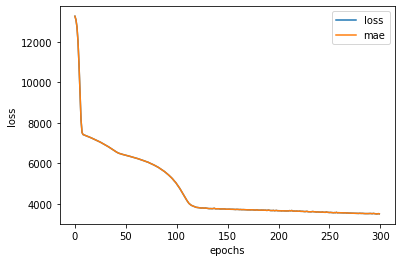

In [360]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before, so TensorFlow has a solution. It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving beyond a certain metric.

### Preprocessing Data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

If not sure, try both normalization and standardization and see which works better.

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from SciKit-Learn

In [362]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [363]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [364]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [365]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one-hot encoded. Now let's build a neural network model from it and see how it goes.

In [366]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 546us/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 515us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 546us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 546us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 515us/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 576us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 546us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 606us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 576us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 546us/s

34/34 [==============================] - 0s 515us/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/100
34/34 [==============================] - 0s 546us/step - loss: 3676.9768 - mae: 3676.9768
Epoch 82/100
34/34 [==============================] - 0s 546us/step - loss: 3673.9495 - mae: 3673.9495
Epoch 83/100
34/34 [==============================] - 0s 515us/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/100
34/34 [==============================] - 0s 515us/step - loss: 3664.5752 - mae: 3664.5752
Epoch 85/100
34/34 [==============================] - 0s 515us/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 546us/step - loss: 3660.3044 - mae: 3660.3044
Epoch 87/100
34/34 [==============================] - 0s 546us/step - loss: 3657.5137 - mae: 3657.5137
Epoch 88/100
34/34 [==============================] - 0s 515us/step - loss: 3655.2200 - mae: 3655.2200
Epoch 89/100
34/34 [==============================] - 0s 546us/step - loss: 3653.8831 

In [288]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 625us/step - loss: 3438.7842 - mae: 3438.7842


[3438.7841796875, 3438.7841796875]

In [289]:
# Insurance model 2
# 9/9 [==============================] - 0s 500us/step - loss: 4924.4961 - mae: 4924.4961

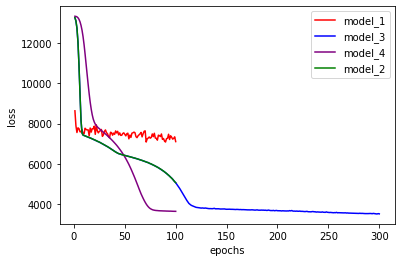

In [382]:
# Plot history (also known as a loss curve or training curve)
x = np.linspace(1, (len(history_2.history['loss'])), 100)
x_300 = np.linspace(1, (len(history_3.history['loss'])), 300)

fig, ax = plt.subplots()

ax.plot(x, history_1.history['loss'], c='r', label="model_1")
ax.plot(x_300, history_3.history['loss'], c='b', label="model_3")
ax.plot(x, history_4.history['loss'], c='purple', label="model_4")
ax.plot(x, history_2.history['loss'], c='g', label="model_2")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()